## Models 2: Decision Tree, Bagged Tree, Random Forest Using Binary Labels

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
# Import the dataset from the preprocessing stage
train_df = pd.read_csv('binary_for_models.csv')
train_df.head()

,Unnamed: 0,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [3]:
train_df = train_df.drop('Unnamed: 0', axis=1)

In [4]:
train_df.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [5]:
# Splitting the outcome and the predictor variables
target = train_df['status_group']
train_df = train_df.drop('status_group', axis=1)

In [6]:
# Create dummy variables
train_df = pd.get_dummies(train_df)
train_df.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.25, random_state=42)

In [8]:
# Build the first tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [9]:
# Feature importance
tree_clf.feature_importances_

array([7.05558901e-02, 5.04106303e-03, 1.55416226e-03, 3.48432955e-04,
       0.00000000e+00, 2.37702594e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.40758769e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.42762652e-04, 0.00000000e+00, 1.68903975e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.30623534e-02, 0.00000000e+00,
       0.00000000e+00, 5.52557804e-04, 2.53507084e-03, 5.37489558e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.43399173e-04, 0.00000000e+00, 0.00000000e+00,
       1.02144694e-03, 0.00000000e+00, 7.89618731e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

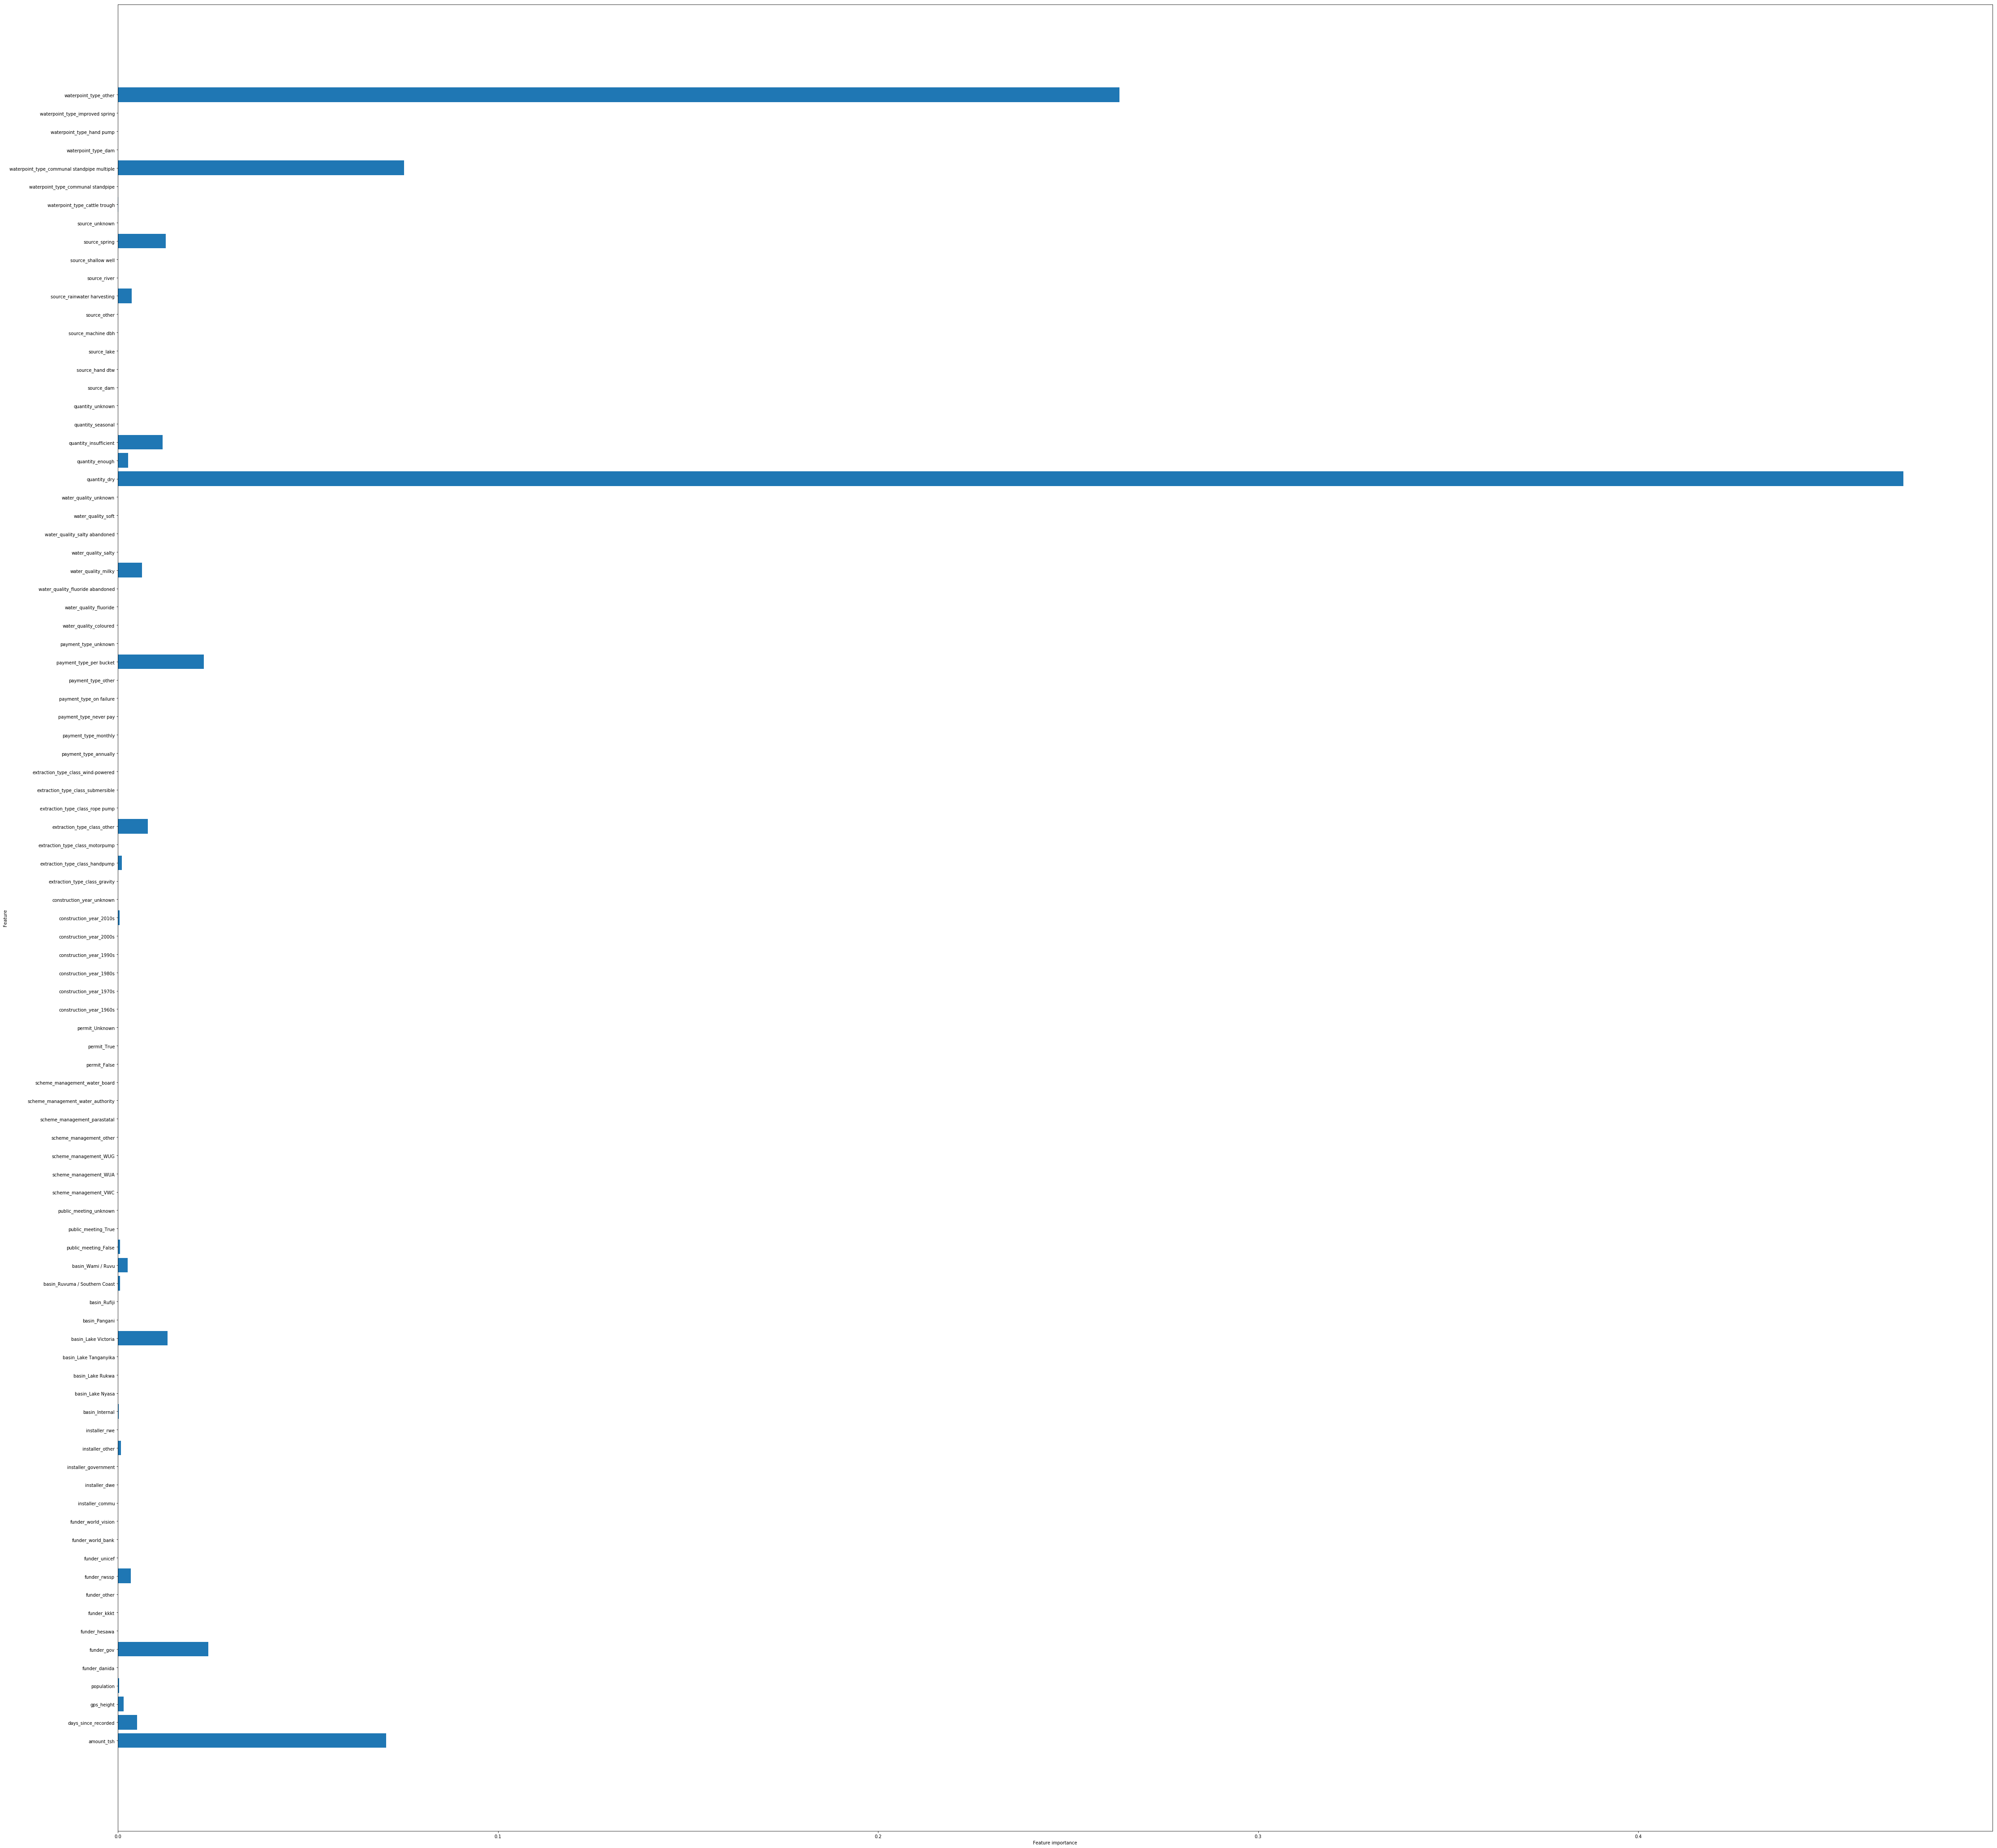

In [10]:
def plot_features_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(75,75))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_features_importances(tree_clf)

In [11]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7233  865]
 [3253 3499]]
              precision    recall  f1-score   support

  functional       0.69      0.89      0.78      8098
needs repair       0.80      0.52      0.63      6752

    accuracy                           0.72     14850
   macro avg       0.75      0.71      0.70     14850
weighted avg       0.74      0.72      0.71     14850



In [12]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred)*100))

Testing Accuracy for Decision Tree Classifier: 72.27%


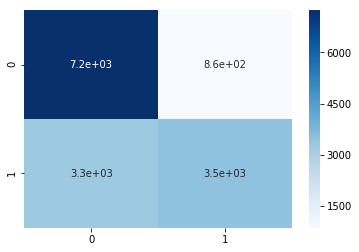

In [13]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues')

## Trying Bagged Trees

In [14]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [15]:
# Fit to training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [16]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.7299214365881033

In [17]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.7272727272727273

In [18]:
bagged_tree_preds = bagged_tree.predict(X_test)
print(classification_report(y_test, bagged_tree_preds))

              precision    recall  f1-score   support

  functional       0.68      0.93      0.79      8098
needs repair       0.86      0.48      0.62      6752

    accuracy                           0.73     14850
   macro avg       0.77      0.71      0.70     14850
weighted avg       0.76      0.73      0.71     14850



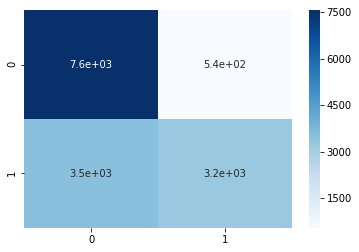

In [19]:
sns.heatmap(confusion_matrix(y_test, bagged_tree_preds), annot=True, cmap='Blues')

## Random Forests

In [20]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
# Training accuracy score
forest.score(X_train, y_train)

0.7404938271604938

In [22]:
# Test accuracy score
forest.score(X_test, y_test)

0.7360942760942761

In [23]:
forest_preds = forest.predict(X_test)
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

  functional       0.69      0.94      0.79      8098
needs repair       0.87      0.49      0.63      6752

    accuracy                           0.74     14850
   macro avg       0.78      0.72      0.71     14850
weighted avg       0.77      0.74      0.72     14850



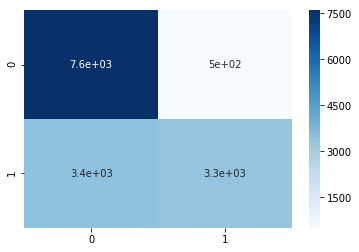

In [24]:
sns.heatmap(confusion_matrix(y_test, forest_preds), annot=True, cmap='Blues')

## Using Gridsearch

In [25]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score: .2%}")

Mean Cross Validation Score:  76.87%


In [26]:
dt_param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 3, 4, 5, 6],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

In [27]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [28]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 74.82%
Mean Test Score: 78.49%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [29]:
forest_2 = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=4, min_samples_split=10)
mean_forest_2_cv_score = np.mean(cross_val_score(forest_2, X_train, y_train, cv=3))
print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_forest_2_cv_score: .2%}")
forest_2.fit(X_train, y_train)

/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Cross Validation Score for Random Forest Classifier:  79.74%


/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
forest_2.score(X_train, y_train)

0.8481481481481481

In [31]:
forest_2.score(X_test, y_test)

0.8059259259259259

In [32]:
forest_2_preds = forest_2.predict(X_test)
print(classification_report(y_test, forest_2_preds))

              precision    recall  f1-score   support

  functional       0.79      0.88      0.83      8098
needs repair       0.83      0.72      0.77      6752

    accuracy                           0.81     14850
   macro avg       0.81      0.80      0.80     14850
weighted avg       0.81      0.81      0.80     14850



Text(33,0.5,'True')

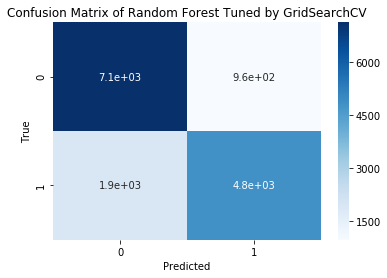

In [41]:
labels = ['functioning', 'needs repair']
sns.heatmap(confusion_matrix(y_test, forest_2_preds), annot=True, cmap='Blues')
plt.title('Confusion Matrix of Random Forest Tuned by GridSearchCV')
plt.xlabel('Predicted')
plt.ylabel('True')

In [34]:
rf_param_grid = {'n_estimators': [10, 30, 100],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 6, 10],
                'min_samples_split': [5, 10],
                'min_samples_leaf': [3,6]}

In [35]:
rf_grid_search = GridSearchCV(forest_2, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)
print(f"Testing Accuracy: {rf_grid_search.best_score_: .2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy:  80.84%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [36]:
forest_3 = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
mean_forest_3_cv_score = np.mean(cross_val_score(forest_3, X_train, y_train, cv=3))
print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_forest_3_cv_score: .2%}")
forest_3.fit(X_train, y_train)


Mean Cross Validation Score for Random Forest Classifier:  80.83%


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
forest_3.score(X_train, y_train)

0.8701234567901235

In [38]:
forest_3.score(X_test, y_test)

0.813063973063973

In [39]:
forest_3_preds = forest_3.predict(X_test)
print(classification_report(y_test, forest_3_preds))

              precision    recall  f1-score   support

  functional       0.79      0.89      0.84      8098
needs repair       0.84      0.72      0.78      6752

    accuracy                           0.81     14850
   macro avg       0.82      0.81      0.81     14850
weighted avg       0.82      0.81      0.81     14850



Text(33,0.5,'True')

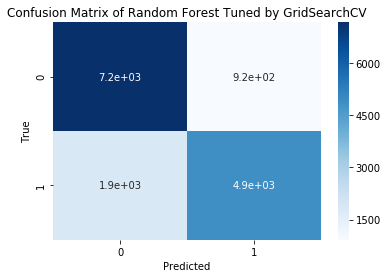

In [42]:
sns.heatmap(confusion_matrix(y_test, forest_3_preds), annot=True, cmap="Blues")
plt.title('Confusion Matrix of Random Forest Tuned by GridSearchCV')
plt.xlabel('Predicted')
plt.ylabel('True')
